# COURSE: A deep understanding of deep learning
## SECTION: Metaparameters (activation, batch, optimizers)
### LECTURE: Loss functions in Pytorch
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202212

In [1]:
# import libraries
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

# Mean-squared error

y shape & type torch.Size([]) <class 'torch.Tensor'> tensor(0.5000)
yhat shape & type torch.Size([101]) <class 'torch.Tensor'>


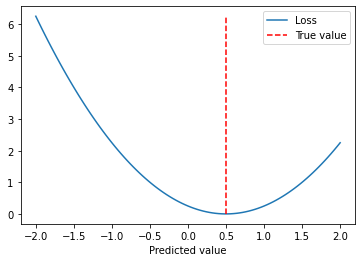

In [17]:
# loss function
lossfunMSE = nn.MSELoss()

# create predictions and real answer
yHat = torch.linspace(-2,2,101)
y = torch.tensor(.5)

print('y shape & type',y.shape,type(y),y)
print('yhat shape & type',yHat.shape,type(yHat))

# compute MSE loss function
L = np.zeros(101)
for i,yy in enumerate(yHat):
  L[i] = lossfunMSE(yy,y)

plt.plot(yHat,L,label='Loss')
plt.plot([y,y],[0,np.max(L)],'r--',label='True value')
plt.xlabel('Predicted value')
plt.legend()
plt.show()

# Binary cross-entropy

y shape & type torch.Size([]) <class 'torch.Tensor'> tensor(0.5000)
yhat shape & type torch.Size([101]) <class 'torch.Tensor'>


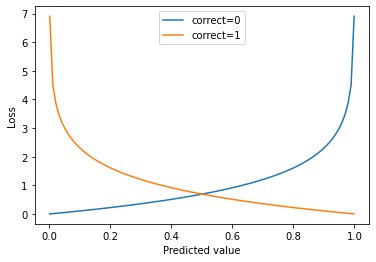

In [18]:
# loss function
lossfunBCE = nn.BCELoss()

# create predictions and real answer
yHat = torch.linspace(.001,.999,101)
y1 = torch.tensor(0.)
y2 = torch.tensor(1.)

print('y shape & type',y1.shape,type(y1),y)
print('yhat shape & type',yHat.shape,type(yHat))

# compute MSE loss function
L = np.zeros((101,2))
for i,yy in enumerate(yHat):
  L[i,0] = lossfunBCE(yy,y1) # 0 is the correct answer
  L[i,1] = lossfunBCE(yy,y2) # 1 is the correct answer

plt.plot(yHat,L)
plt.xlabel('Predicted value')
plt.ylabel('Loss')
plt.legend(['correct=0','correct=1'])
# plt.yscale('log')
plt.show()

In [19]:
# However, PyTorch recommends using a single function that incorporates sigmoid+BCE due to increased numerical stability.
# https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html?highlight=nn%20bcewithlogitsloss#torch.nn.BCEWithLogitsLoss


# Thus, the recommended way to do it:
lossfunBCE = nn.BCEWithLogitsLoss()
yHat = torch.tensor(2.)
print(lossfunBCE(yHat,y2))

print('y shape & type',y1.shape,type(y1),y)
print('yhat shape & type',yHat.shape,type(yHat))

# In toy examples, numerical accuracy usually isn't a problem.

tensor(0.1269)
y shape & type torch.Size([]) <class 'torch.Tensor'> tensor(0.5000)
yhat shape & type torch.Size([]) <class 'torch.Tensor'>


In [5]:
# The example above shows data already in probabilities. Raw outputs will need to be converted to probabilities:

# "raw" output of a model
yHat = torch.tensor(2.)
print(lossfunBCE(yHat,y2))

# convert to prob via sigmoid
sig = nn.Sigmoid()
print(lossfunBCE( sig(yHat) ,y2))


tensor(0.1269)
tensor(0.3467)


In [6]:
# However, PyTorch recommends using a single function that incorporates sigmoid+BCE due to increased numerical stability.
# https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html?highlight=nn%20bcewithlogitsloss#torch.nn.BCEWithLogitsLoss


# Thus, the recommended way to do it:
lossfunBCE = nn.BCEWithLogitsLoss()
yHat = torch.tensor(2.)
print(lossfunBCE(yHat,y2))

# In toy examples, numerical accuracy usually isn't a problem.

tensor(0.1269)


# Categorical cross-entropy

In [21]:
# loss function
lossfunCCE = nn.CrossEntropyLoss()

# vector of output layer (pre-softmax)
yHat = torch.tensor([[1.,4,3]])
c = torch.tensor([2])

print('y shape & type',c.shape,type(c),c)
print('yhat shape & type',yHat.shape,type(yHat))


for i in range(3):
  correctAnswer = torch.tensor([i])
  thisloss = lossfunCCE(yHat,correctAnswer).item()
  print( 'Loss when correct answer is %g: %g' %(i,thisloss) )

y shape & type torch.Size([1]) <class 'torch.Tensor'> tensor([2])
yhat shape & type torch.Size([1, 3]) <class 'torch.Tensor'>
Loss when correct answer is 0: 3.34901
Loss when correct answer is 1: 0.349012
Loss when correct answer is 2: 1.34901


In [8]:
# Repeat using pre-softmaxified output
#sm = nn.Softmax(dim=1)
#yHat_sm = sm(yHat)

for i in range(3):
  correctAnswer = torch.tensor([i])
  thisloss = lossfunCCE(yHat_sm,correctAnswer).item()
  print( 'Loss when correct answer is %g: %g' %(i,thisloss) )

NameError: name 'yHat_sm' is not defined

In [ ]:
# compare raw, softmax, and log-softmax outputs
sm = nn.LogSoftmax(dim=1)
yHat_logsm = sm(yHat)

# print them
print(yHat)
print(yHat_sm)
print(yHat_logsm)

# Creating your own custom loss function

In [ ]:
class myLoss(nn.Module): # inherent info from nn.Module
  def __init__(self):
    super().__init__()
      
  def forward(self,x,y):
    loss = torch.abs(x-y)
    return loss

# test it out!
lfun = myLoss()
lfun(torch.tensor(4),torch.tensor(5.2))